<a href="https://colab.research.google.com/github/Dimisz/Portfolio/blob/main/Python/DeepLearning/TensorFlow/ComputerVision/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Identification: Multiclass Classification.


## 1. Data

Data is downloaded [from Kaggle](https://www.kaggle.com/c/dog-breed-identification/data). The data file is too big to put it into GitHub repo.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q "/content/drive/MyDrive/DogVision/dog-breed-identification.zip" -d "/content/drive/MyDrive/DogVision/unpacked"

### Prepare the data 

In [5]:
# Check the labels
import pandas as pd

labels_csv = pd.read_csv("/content/drive/MyDrive/DogVision/unpacked/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     3fe88fd71334eea9924c28d2423b844c  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


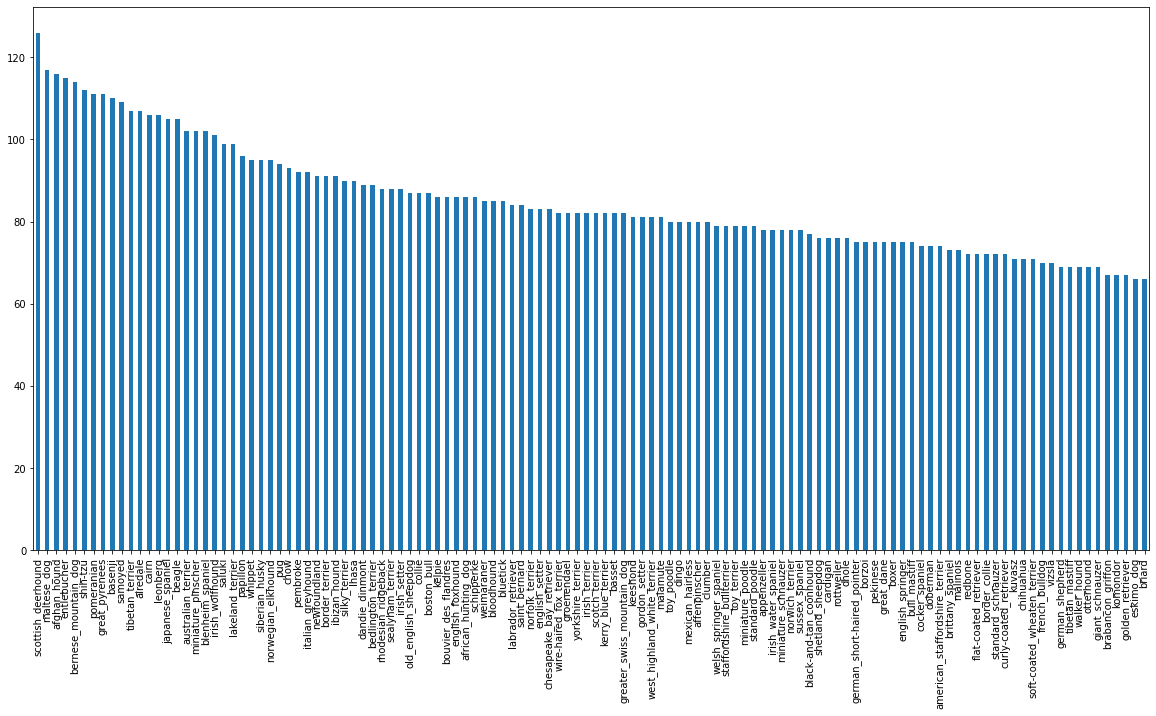

In [11]:
# How many images are there per each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [14]:
# Explore how balanced is the dataset
labels_csv['breed'].value_counts().min(), labels_csv['breed'].value_counts().max(), labels_csv['breed'].value_counts().mean(),  

(66, 126, 85.18333333333334)

For image classification at least 10 images per label needed.

Our dataset fulfills the requirement, it could be better though, since 100 images per label is recommended.

### Prepare the images

In [26]:
from IPython.display import Image

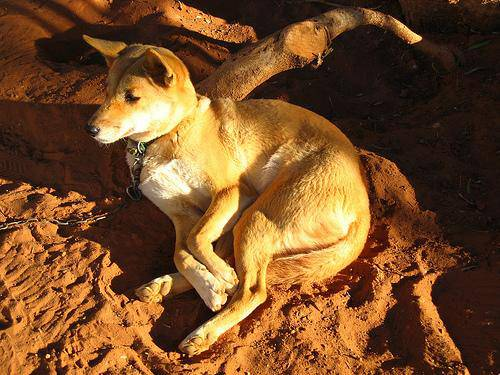

In [28]:
Image("drive/MyDrive/DogVision/unpacked/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

#### Get a list of all off our images pathnames

In [17]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [31]:
# Pathnames for images ids
filenames = ["drive/MyDrive/DogVision/unpacked/train/"+fname+".jpg" for fname in labels_csv['id']]
filenames[:10]

['drive/MyDrive/DogVision/unpacked/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DogVision/unpacked/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DogVision/unpacked/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DogVision/unpacked/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DogVision/unpacked/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DogVision/unpacked/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DogVision/unpacked/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DogVision/unpacked/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DogVision/unpacked/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DogVision/unpacked/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [32]:
# Check whether number of filenames matched number of actual image files
import os
if len(os.listdir("drive/MyDrive/DogVision/unpacked/train/")) == len(filenames):
  print("Filenames match actual amount of files! Proceed!")
else:
  print("Filenames do not match actual amount of files. Check the target directory.")

Filenames match actual amount of files! Proceed!


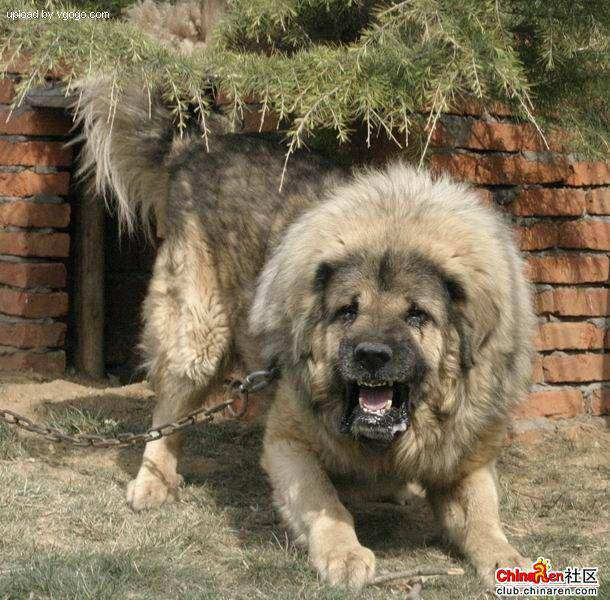

In [33]:
# Manual check
Image(filenames[9000])

In [35]:
labels_csv["breed"][9000]

'tibetan_mastiff'

### Convert the labels into numbers